---
format:
  html:
    css: styles.css
    embed-resources: true
    fig-width: 9
    fig-height: 6
    html-math-method: katex
jupyter: python3
code-fold: true
code-overflow: wrap
---

# **Vectors and Matrices**

## **Vectors**

A vector is a mathematical object that possesses both magnitude (or length) and direction. This distinguishes it from a scalar, which has only magnitude.
Examples: velocity (speed and direction), force (strength and direction), displacement (distance and direction).

**Magnitude:** The magnitude of a vector is its length or size. It's a scalar quantity and is always non-negative. We denote the magnitude of a vector $\vec{v}$ as $||\vec{v}||$ or simply $v$.<br>
**Direction:** The direction of a vector indicates the line of action and sense of the vector. It can be specified using angles relative to a reference axis or by comparing it to another vector.<br>

### **Geometric Representation of Vectors in 2D and 3D**

**2D Representation:**
* In a two-dimensional plane (like the xy-plane), a vector is typically represented as an arrow.
* The tail of the arrow is the starting point (initial point), and the head of the arrow is the ending point (terminal point).
* The length of the arrow represents the magnitude of the vector.
* The orientation of the arrow represents the direction of the vector.
* Example: A vector representing a wind velocity of 10 m/s blowing northeast.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.display import display, HTML
import manim as mn
from manim import *
config.media_embed = True

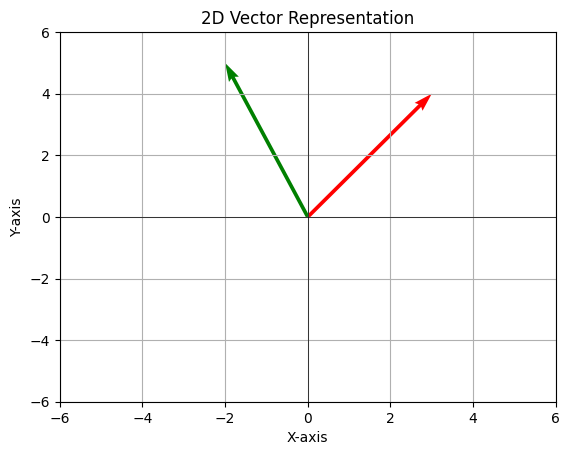

In [2]:
def plot_2d_vectors(vectors, colors=None):
    fig, ax = plt.subplots()
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid()
    
    for i, vec in enumerate(vectors):
        color = colors[i] if colors else 'blue'
        ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=color)
    
    max_val = np.max(np.abs(vectors)) + 1
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('2D Vector Representation')
    plt.show()

vectors_2d = [np.array([3, 4]), np.array([-2, 5])]
plot_2d_vectors(vectors_2d, colors=['red', 'green'])

**3D Representation:**
* In three-dimensional space (like the xyz-space), vectors are still represented as arrows, but now they exist in a three-dimensional coordinate system.
* The concepts of magnitude and direction remain the same.
* Example: A vector representing the force acting on an object in 3D space.

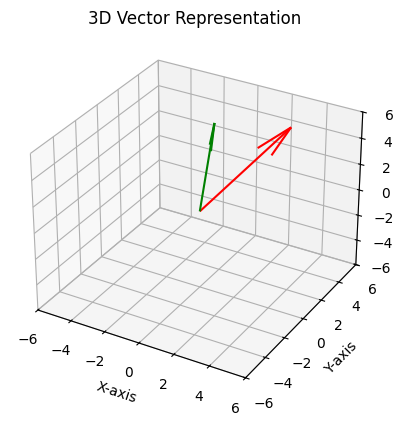

In [3]:
def plot_3d_vectors(vectors, colors=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(0, 0, 0, *zip(*vectors), color=colors if colors else 'blue')
    
    max_val = np.max(np.abs(vectors)) + 1
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    ax.set_zlim(-max_val, max_val)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('3D Vector Representation')
    plt.show()

vectors_3d = [np.array([3, 4, 5]), np.array([-2, 5, 3])]
plot_3d_vectors(vectors_3d, colors=['red', 'green'])

**n-dimension vector**

The concept of vectors can be extended beyond 3d to any number of dimensions (n-dimensions). An n-dimensional vector has n components: $\vec{v} = \langle v_1, v_2, ..., v_n \rangle$.<br>
**Example:** Vectors are used to represent data points in high dimensional data sets.

**Component Form of Vectors (e.g., $v=⟨v1​,v2​,v3​⟩$).**

* **Component Form:**
    * Vectors can be expressed in component form, which is particularly useful for mathematical operations.
    * In 2D, a vector $\vec{v}$ can be written as $\vec{v} = \langle v_1, v_2 \rangle$, where $v_1$ and $v_2$ are the components of the vector along the x-axis and y-axis, respectively.
    * In 3D, a vector $\vec{v}$ can be written as $\vec{v} = \langle v_1, v_2, v_3 \rangle$, where $v_1$, $v_2$, and $v_3$ are the components along the x-axis, y-axis, and z-axis, respectively.
    * The components can be found by projecting the vector onto the coordinate axes.

**Example**: a vector that moves an object 2 units in the x direction, 3 units in the y direction, and -1 units in the z direction would be represented as $\vec{v} = \langle 2, 3, -1 \rangle$.

* **Magnitude in Component Form:**
    * The magnitude of a vector in component form can be calculated using the Pythagorean theorem:
        * In 2D: $||\vec{v}|| = \sqrt{v_1^2 + v_2^2}$
        * In 3D: $||\vec{v}|| = \sqrt{v_1^2 + v_2^2 + v_3^2}$

### **Types of Vectors**

#### **1. Based on Dimension & Space**  
##### **Zero Vector (Null Vector)**<br>
 A vector with all components equal to zero, meaning it is a vector with zero magnitude and an undefined direction, often represented as (0, 0) in two dimensions or (0, 0, 0) in three dimensions

##### **Unit Vector**<br>
A unit vector is fundamentally a vector whose magnitude, or length, is precisely one. Its primary function is to indicate direction within a given space. A common convention to denote that a vector is a unit vector is the use of the "hat" symbol, such as in $\mathbf{\hat{u}}$. To obtain a unit vector $\mathbf{\hat{u}}$ that shares the same direction as a given vector $\mathbf{v}$, one must divide the vector $\mathbf{v}$ by its magnitude, represented as $||\mathbf{v}||$. This process effectively scales the vector down to a length of one while preserving its original direction. The magnitude of a vector $\mathbf{v} = \langle v_1, v_2, v_3 \rangle$ is calculated using the formula $||\mathbf{v}|| = \sqrt{v_1^2 + v_2^2 + v_3^2}$.<br>
**Example**:

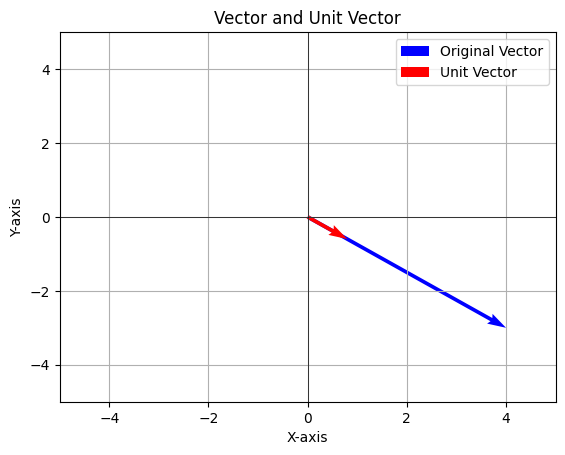

In [4]:
def plot_unit_vector(vector):
  """
  Plots a vector and its corresponding unit vector.

  Args:
    vector: A list or tuple representing the vector.
  """
  magnitude = math.sqrt(sum(x**2 for x in vector))

  if magnitude == 0:
    print("Vector has zero magnitude, cannot plot unit vector.")
    return

  unit_vector = [x / magnitude for x in vector]

  plt.figure()
  plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original Vector')
  plt.quiver(0, 0, unit_vector[0], unit_vector[1], angles='xy', scale_units='xy', scale=1, color='red', label='Unit Vector')

  # Set axis limits to accommodate both vectors
  max_val = max(abs(vector[0]), abs(vector[1]), abs(unit_vector[0]), abs(unit_vector[1]))
  plt.xlim([-max_val - 1, max_val + 1])
  plt.ylim([-max_val - 1, max_val + 1])

  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.title('Vector and Unit Vector')
  plt.legend()
  plt.grid(True)
  plt.axhline(0, color='black',linewidth=0.5)
  plt.axvline(0, color='black',linewidth=0.5)
  plt.show()

# Example usage:
vector1 = [4, -3] #try to change the values
plot_unit_vector(vector1)

In a three-dimensional Cartesian coordinate system, there are three essential unit vectors: $\mathbf{\hat{i}} = \langle 1, 0, 0 \rangle$, $\mathbf{\hat{j}} = \langle 0, 1, 0 \rangle$, and $\mathbf{\hat{k}} = \langle 0, 0, 1 \rangle$, which correspond to the x, y, and z axes, respectively. These standard unit vectors form the basis for expressing any vector in 3D space as a linear combination.<br>
**Example:**<br>
a vector $\mathbf{v} = \langle a, b, c \rangle$ can be expressed as $\mathbf{v} = a\mathbf{\hat{i}} + b\mathbf{\hat{j}} + c\mathbf{\hat{k}}$.


##### **Position Vector**
A vector representing the position of a point relative to the origin.

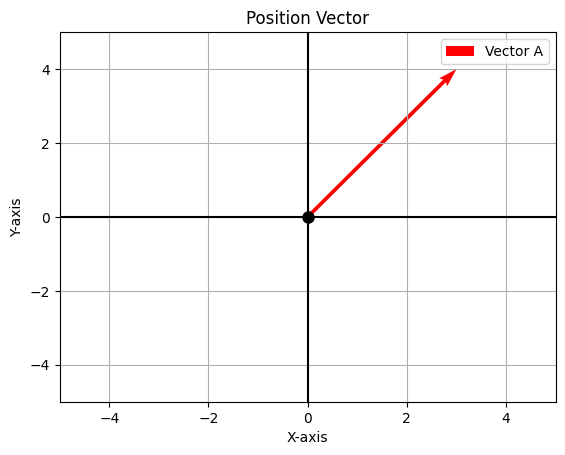

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_position_vector(vector, origin=(0, 0), label="Position Vector"):
  """Plots a position vector in 2D space with prominent axes and origin.

  Args:
    vector: A NumPy array or a list representing the vector's components [x, y].
    origin: A tuple representing the origin point (x, y) of the vector. Defaults to (0, 0).
    label: A string representing the label for the vector in the plot.
  """
  vector = np.array(vector)
  origin = np.array(origin)

  plt.quiver(*origin, *vector, angles='xy', scale_units='xy', scale=1, color='r', label=label)

  # Set plot limits to include the origin and the vector's endpoint
  max_val = max(abs(vector[0]), abs(vector[1]), abs(origin[0]), abs(origin[1]))
  plt.xlim(-max_val - 1, max_val + 1)
  plt.ylim(-max_val - 1, max_val + 1)

  # Make origin (0, 0) prominent
  plt.plot(0, 0, 'ko', markersize=8)

  # Make x and y axes prominent
  plt.axhline(0, color='black', linewidth=1.5)  # Thicker x-axis
  plt.axvline(0, color='black', linewidth=1.5)  # Thicker y-axis

  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.title("Position Vector")
  plt.grid(True)
  plt.legend()
  plt.show()

# Example usage:
vector1 = [3, 4]
plot_position_vector(vector1, label="Vector A")

##### **Displacement Vector**
 Represents the change in position of an object.

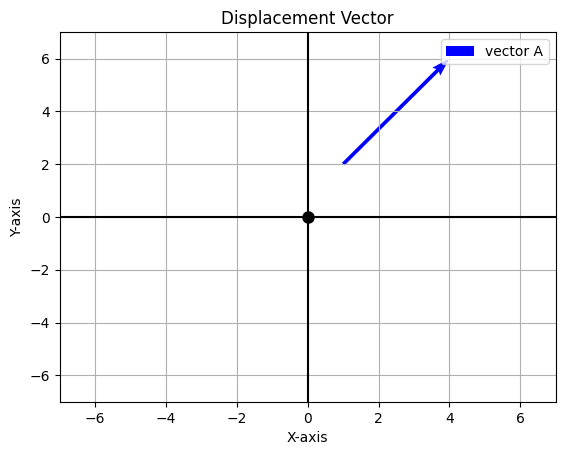

In [6]:
def plot_displacement_vector(start, end, label="Displacement Vector"):
  """Plots a displacement vector in 2D space with a prominent origin and axes.

  Args:
    start: A tuple or list representing the starting point (x, y).
    end: A tuple or list representing the ending point (x, y).
    label: A string representing the label for the vector in the plot.
  """
  start = np.array(start)
  end = np.array(end)
  displacement = end - start

  plt.quiver(*start, *displacement, angles='xy', scale_units='xy', scale=1, color='b', label=label)

  # Set plot limits to include the start, end, and origin
  all_points = np.concatenate((start, end, [0, 0])) #include origin for calculating max
  max_val = max(abs(all_points))
  plt.xlim(-max_val - 1, max_val + 1)
  plt.ylim(-max_val - 1, max_val + 1)

  # Make origin (0, 0) prominent
  plt.plot(0, 0, 'ko', markersize=8)

  # Make x and y axes prominent
  plt.axhline(0, color='black', linewidth=1.5)
  plt.axvline(0, color='black', linewidth=1.5)

  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.title("Displacement Vector")
  plt.grid(True)
  plt.legend()
  plt.show()

start_point = (1, 2) #try to change the values of both start and end points
end_point = (4, 6)
plot_displacement_vector(start_point, end_point, label="vector A")

on 3D space

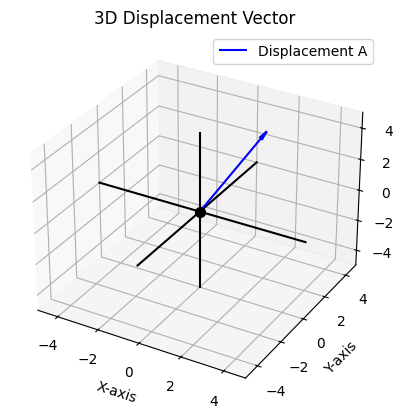

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_displacement_vector(start, end, label="Displacement Vector"):
    """Plots a 3D displacement vector with a prominent origin and axes.

    Args:
        start: A tuple or list representing the starting point (x, y, z).
        end: A tuple or list representing the ending point (x, y, z).
        label: A string representing the label for the vector.
    """
    start = np.array(start)
    end = np.array(end)
    displacement = end - start

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.quiver(*start, *displacement, color='b', arrow_length_ratio=0.1, label=label)

    # Set plot limits to include the start, end, and origin
    all_points = np.concatenate((start, end, [0, 0, 0]))
    max_val = max(abs(all_points))
    ax.set_xlim([-max_val - 1, max_val + 1])
    ax.set_ylim([-max_val - 1, max_val + 1])
    ax.set_zlim([-max_val - 1, max_val + 1])

    # Make origin (0, 0, 0) prominent
    ax.scatter(0, 0, 0, color='k', s=50)

    # Make x, y, and z axes prominent
    ax.plot([-max_val - 1, max_val + 1], [0, 0], [0, 0], color='black', linewidth=1.5)  # x-axis
    ax.plot([0, 0], [-max_val - 1, max_val + 1], [0, 0], color='black', linewidth=1.5)  # y-axis
    ax.plot([0, 0], [0, 0], [-max_val - 1, max_val + 1], color='black', linewidth=1.5)  # z-axis

    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title("3D Displacement Vector")
    ax.legend()
    plt.show()

# Example usage:

start_point1 = (0,0,0)
end_point1 = (1,4,3)
plot_3d_displacement_vector(start_point1, end_point1, label = "Displacement A")

#### **2. Based on Direction & Magnitude**  
##### **Collinear Vectors**
Collinear vectors are vectors that are parallel to the same line, regardless of their magnitude or direction. This means they can point in the same direction, opposite directions, or have different lengths. A crucial condition for two vectors to be collinear is that one vector must be a scalar multiple of the other. In other words, if vectors **a** and **b** are collinear, then there exists a scalar 'k' such that **a** = k**b**. In three dimensional space, another way to determine if vectors are collinear, is to take the cross product of the two vectors. If the cross product equals the zero vector, then the vectors are collinear.



Example 1: 2D Collinear Vectors


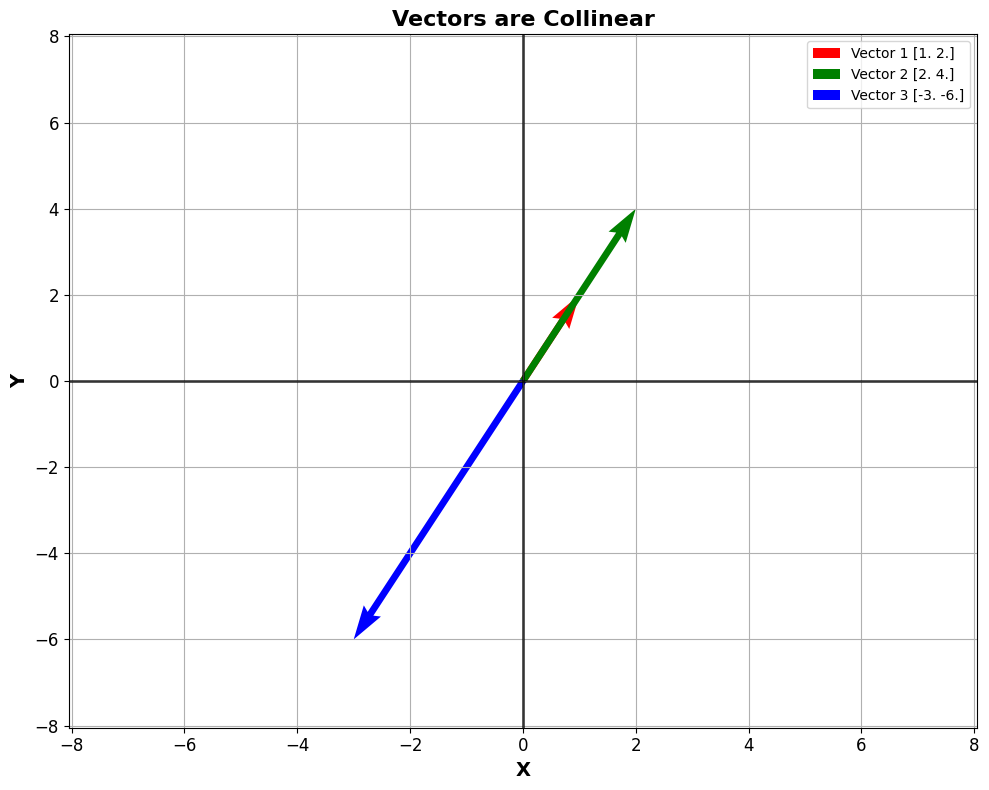

Are vectors collinear? True

Example 2: 3D Collinear Vectors


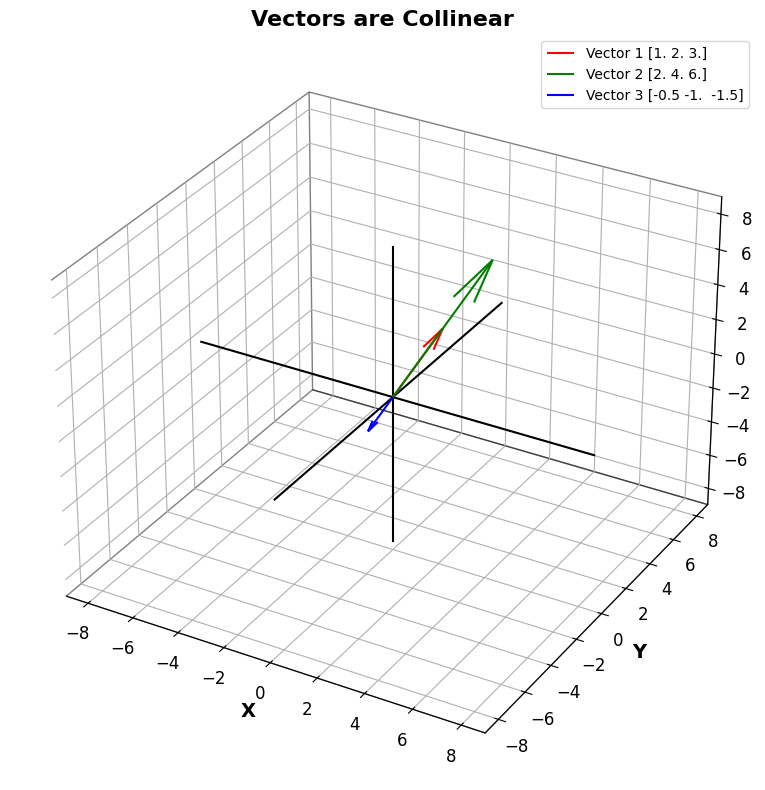

Are vectors collinear? True


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def are_vectors_collinear(vectors, visualize=True):
    """
    Check if all n-dimensional vectors in the input list are collinear and visualize them.
    
    Args:
        vectors: List of numpy arrays or lists representing vectors.
                 All vectors must have the same dimension.
        visualize: Boolean to determine whether to create a visualization.
    
    Returns:
        bool: True if all vectors are collinear, False otherwise.
    """
    # Convert all vectors to numpy arrays if they aren't already
    vectors = [np.array(v, dtype=float) for v in vectors]
    
    # Check that all vectors have the same dimension
    dimensions = [v.shape[0] for v in vectors]
    if len(set(dimensions)) > 1:
        raise ValueError("All vectors must have the same dimension")
    
    dimension = dimensions[0]
    if dimension not in [2, 3] and visualize:
        print(f"Warning: Cannot visualize {dimension}-dimensional vectors. Visualization skipped.")
        visualize = False
    
    # If there are fewer than 2 vectors, they are trivially collinear
    if len(vectors) < 2:
        result = True
    else:
        # Find the first non-zero vector to use as reference
        ref_vector = None
        for v in vectors:
            if np.any(v != 0):  # Check if vector is not all zeros
                ref_vector = v
                break
        
        # If all vectors are zero vectors, they are collinear
        if ref_vector is None:
            result = True
        else:
            # Calculate the magnitude of the reference vector
            ref_magnitude = np.linalg.norm(ref_vector)
            
            # Check if each vector is a scalar multiple of the reference vector
            result = True
            for v in vectors:
                # Skip zero vectors as they're collinear with any other vector
                if np.all(v == 0):
                    continue
                    
                # Calculate the magnitude of the current vector
                v_magnitude = np.linalg.norm(v)
                
                # Calculate the cosine of the angle between vectors using dot product
                cos_angle = np.dot(ref_vector, v) / (ref_magnitude * v_magnitude)
                
                # Allow for floating point errors with np.isclose
                if not np.isclose(abs(cos_angle), 1.0):
                    result = False
                    break
    
    # Create a visualization if requested and vectors are 2D or 3D
    if visualize:
        plot_vectors(vectors, result)
    
    return result

def plot_vectors(vectors, are_collinear):
    """
    Plot the vectors in 2D or 3D space.
    
    Args:
        vectors: List of numpy arrays representing vectors.
        are_collinear: Boolean indicating whether the vectors are collinear.
    """
    # Determine dimensionality
    dim = vectors[0].shape[0]
    
    # Set up colors for different vectors
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    
    # Create a figure
    fig = plt.figure(figsize=(10, 8))
    
    # Choose between 2D and 3D plotting
    if dim == 2:
        ax = fig.add_subplot(111)
        
        # Plot each vector
        for i, v in enumerate(vectors):
            color = colors[i % len(colors)]
            # Plot the vector from origin
            ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=color, 
                     label=f'Vector {i+1} {v}')
            
        # Set plot limits to ensure all vectors are visible
        max_magnitude = max([np.linalg.norm(v) for v in vectors if np.any(v != 0)], default=1)
        lim = max_magnitude * 1.2  # Add some padding
        ax.set_xlim([-lim, lim])
        ax.set_ylim([-lim, lim])
        
        # Add features with more prominent axes
        ax.grid(True)
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.7, linewidth=2)
        ax.axvline(x=0, color='k', linestyle='-', alpha=0.7, linewidth=2)
        ax.set_xlabel('X', fontsize=14, fontweight='bold')
        ax.set_ylabel('Y', fontsize=14, fontweight='bold')
        
        # Add tick marks with larger font
        ax.tick_params(axis='both', which='major', labelsize=12)
        
    elif dim == 3:
        ax = fig.add_subplot(111, projection='3d')
        
        # Plot each vector
        for i, v in enumerate(vectors):
            color = colors[i % len(colors)]
            # Plot the vector from origin
            ax.quiver(0, 0, 0, v[0], v[1], v[2], color=color, label=f'Vector {i+1} {v}')
            
        # Set plot limits
        max_magnitude = max([np.linalg.norm(v) for v in vectors if np.any(v != 0)], default=1)
        lim = max_magnitude * 1.2  # Add some padding
        ax.set_xlim([-lim, lim])
        ax.set_ylim([-lim, lim])
        ax.set_zlim([-lim, lim])
        
        # Add features with more prominent axes
        ax.plot([-max_magnitude - 1, max_magnitude + 1], [0, 0], [0, 0], color='black', linewidth=1.5)  # x-axis
        ax.plot([0, 0], [-max_magnitude - 1, max_magnitude + 1], [0, 0], color='black', linewidth=1.5)  # y-axis
        ax.plot([0, 0], [0, 0], [-max_magnitude - 1, max_magnitude + 1], color='black', linewidth=1.5)  # z-axis
        ax.set_xlabel('X', fontsize=14, fontweight='bold')
        ax.set_ylabel('Y', fontsize=14, fontweight='bold')
        ax.set_zlabel('Z', fontsize=14, fontweight='bold')
        
        # Add tick marks with larger font
        ax.tick_params(axis='both', which='major', labelsize=12)
        
        # Make the pane and grid more visible
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        ax.xaxis.pane.set_edgecolor('black')
        ax.yaxis.pane.set_edgecolor('black')
        ax.zaxis.pane.set_edgecolor('black')
        ax.grid(True, linestyle='-', linewidth=0.8, alpha=0.6)
    
    # Add title based on collinearity result with larger font
    if are_collinear:
        title = "Vectors are Collinear"
    else:
        title = "Vectors are NOT Collinear"
    plt.title(title, fontsize=16, fontweight='bold')
    
    # Add legend
    plt.legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Example 1: Collinear vectors (2D)
    print("\nExample 1: 2D Collinear Vectors")
    v1 = [1, 2]
    v2 = [2, 4] 
    v3 = [-3, -6]
    result = are_vectors_collinear([v1, v2, v3])
    print(f"Are vectors collinear? {result}")
    
    # Example 2: Collinear vectors (3D)
    print("\nExample 2: 3D Collinear Vectors")
    v4 = [1, 2, 3]
    v5 = [2, 4, 6]
    v6 = [-0.5, -1, -1.5]
    result = are_vectors_collinear([v4, v5, v6])
    print(f"Are vectors collinear? {result}")

##### **Coplanar Vectors**
Vectors that lie in the same plane. They are a set of vectors that lie in the same plane. In three-dimensional space, any two vectors are inherently coplanar, as they define a plane. However, the concept becomes more relevant when dealing with three or more vectors.<br>
A key characteristic of coplanar vectors is their linear dependence; three or more vectors are coplanar if and only if one of the vectors can be expressed as a linear combination of the others. Mathematically, given vectors a, b, and c, their coplanarity can be determined by calculating the determinant of the matrix formed by their components; a zero determinant confirms coplanarity.

**Example**

* Consider the vectors $\vec{a} = \hat{i} + \hat{j}$, $\vec{b} = \hat{j} + \hat{k}$, and $\vec{c} = \hat{i} + 2\hat{j} + \hat{k}$.
* To check if they are coplanar, we can calculate the scalar triple product:

$$
\begin{vmatrix} 1 & 1 & 0 \\ 0 & 1 & 1 \\ 1 & 2 & 1 \end{vmatrix} = 1(1 - 2) - 1(0 - 1) + 0(0 - 1) = -1 + 1 + 0 = 0
$$

* Since the scalar triple product is zero, the vectors $\vec{a}$, $\vec{b}$, and $\vec{c}$ are coplanar.


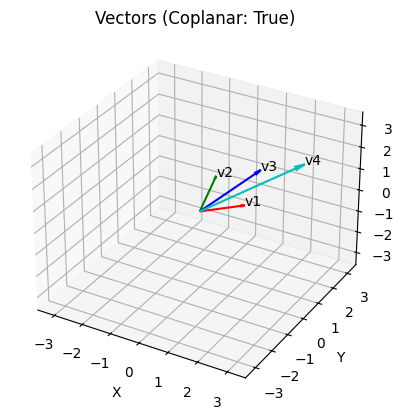

In [9]:
def are_coplanar(vectors):
    """
    Checks if a list of vectors are coplanar using the scalar triple product.

    Args:
        vectors: A list of NumPy arrays representing vectors.

    Returns:
        True if the vectors are coplanar, False otherwise.
    """
    if len(vectors) < 3:
        # Any two vectors are always coplanar.
        return True

    if len(vectors) > 3:
        # Check if a vector is a linear combination of the previous two
        for i in range(2, len(vectors)):
            a = vectors[0]
            b = vectors[1]
            c = vectors[i]
            scalar_triple_product = np.dot(a, np.cross(b, c))
            if scalar_triple_product != 0:
                return False
        return True

    a, b, c = vectors[0], vectors[1], vectors[2]
    scalar_triple_product = np.dot(a, np.cross(b, c))
    return scalar_triple_product == 0

def plot_vectors(vectors, coplanar):
    """
    Plots the given vectors in 3D space.

    Args:
        vectors: A list of NumPy arrays representing vectors.
        coplanar: Boolean indicating if the vectors are coplanar.
    """

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    origin = np.array([0, 0, 0])
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Colors for the vectors

    for i, v in enumerate(vectors):
        ax.quiver(*origin, *v, color=colors[i % len(colors)], arrow_length_ratio=0.1)
        ax.text(*v, f'v{i+1}', color='black')

    max_range = np.max(np.abs(np.concatenate(vectors))) * 1.2  # Adjust plot limits
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])
    ax.set_zlim([-max_range, max_range])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Vectors (Coplanar: {coplanar})')
    plt.show()


vector1 = np.array([1, 1, 0])
vector2 = np.array([0, 1, 1])
vector3 = np.array([1, 2, 1])
vector4 = np.array([2, 2, 0]) #linear combination

vectors_coplanar = [vector1, vector2, vector3]
vectors_coplanar2 = [vector1, vector2, vector4]
vectors_non_coplanar = [vector1, vector2, np.array([1, 0, 0])]

# you can check every combinations of vector and check if they are coplanar or not
vectors_more_than_3 = [np.array([1,1,0]), np.array([0,1,1]), np.array([1,2,1]), np.array([2,3,1])]
coplanar4 = are_coplanar(vectors_more_than_3)
plot_vectors(vectors_more_than_3, coplanar4)

##### **Equal Vectors**
Vectors that have the same magnitude and direction.  

##### **Opposite Vectors (Negative Vectors)**
Vectors with the same magnitude but opposite direction.  

#### **3. Based on Mathematical Operations**  
##### **Free Vector** 
A vector that is independent of its initial position. It is a vector whose point of application is not fixed but magnitude and direction.<br> Same vector can become free or fixed depending on scenario. Like if a force F is applied on a table which has rotational and translational motion. If we are Interested in Translational motion then we consider force F as free vector because we can move it to the centre of mass of the table in solving the problem.


In [14]:
%%manim -qm -v WARNING FreeVectorScene

class FreeVectorScene(Scene):
    def construct(self):
        vector = np.array([2, 1, 0])
        arrow_color = BLUE

        positions = [
            np.array([-3, -1, 0]),
            np.array([-1, 1, 0]),
            np.array([1, -2, 0]),
            np.array([3, 1, 0])
        ]

        arrows = [Arrow(start=pos, end=pos + vector, color=arrow_color) for pos in positions]
        labels = [MathTex(r"\vec{v}").next_to(arrow, UP) for arrow in arrows]

        for arrow, label in zip(arrows, labels):
            self.play(GrowArrow(arrow), Write(label))
            self.wait(0.5)

        self.wait(2)



Manim Community v0.19.0

##### **Bound (Fixed) Vector**
 A vector that is defined with a fixed starting point. 

**Example**<br>
* **Displacement Vector:** An arrow showing how far and in what direction something moved from a starting point.
* **Position Vector:** An arrow showing the location of a point relative to a reference point.
* **Moment of force:** An arrow representing the turning effect of a force around a specific point.



In [15]:
%%manim -qm -v WARNING BoundVector
class BoundVector(Scene):
    def construct(self):
        # Define the origin point
        origin = Dot(ORIGIN, color=WHITE)
        origin_label = MathTex("origin").next_to(origin, DOWN)
        
        # Define the bound vector
        vector = Arrow(ORIGIN, [2, 1, 0], buff=0, color=BLUE)
        vector_label = MathTex("\vec{v}").next_to(vector, UP)
        
        # Animate the elements
        self.play(FadeIn(origin), Write(origin_label))
        self.play(GrowArrow(vector), Write(vector_label))
        
        # Hold the final state
        self.wait(2)


Manim Community v0.19.0

##### **Sliding Vector**
 A vector that can be moved along its line of action without changing its effect.  It combines a vector quantity (like force or moment) with a line of application (or line of action).<br>
\
\
**Examples**:<br>
Forces acting on a rigid body are often represented as sliding vectors because their effect (e.g., causing translation or rotation) is independent of the specific point of application along the line of force

In [17]:
%%manim -qm -v WARNING SlidingVector

class SlidingVector(Scene):
    def construct(self):
        # Define the rigid body (a simple rectangle)
        body = Rectangle(width=2, height=1, color=WHITE).move_to(ORIGIN)
        
        # Define force vectors
        force1 = Arrow(start=LEFT, end=LEFT + RIGHT, color=RED, buff=0).shift(UP * 0.5)
        force2 = Arrow(start=RIGHT, end=RIGHT + LEFT, color=GREEN, buff=0).shift(DOWN * 0.5)
        
        # Labels for forces
        label1 = MathTex("\vec{F}_1").next_to(force1, UP)
        label2 = MathTex("\vec{F}_2").next_to(force2, DOWN)
        
        # Grouping elements
        force_group = VGroup(body, force1, force2, label1, label2)
        
        # Animate the forces acting on the body
        self.play(Create(body))
        self.play(Create(force1), Create(force2))
        
        # Apply movement (simulate body motion due to forces)
        self.play(force_group.animate.shift(RIGHT * 2 + UP * 0.5), run_time=2)
        
        # Hold position
        self.wait(1)



Manim Community v0.19.0

Consider two equal and opposite forces acting on a rigid body along the same line—for instance, pulling at the two opposite ends of a rigid rod. Since these forces are aligned, their effects cancel out, meaning the rod remains in equilibrium.

This demonstrates an important principle: if a force is slid along its own line of action, its overall effect on the rigid body remains unchanged. However, if the point of application of the force is moved off this line—while keeping its magnitude, direction, and sense unchanged—the force's effect on the rigid body will change. This is because forces applied at different points can introduce rotational effects (torques), which influence how the body moves or rotates.

#### **4. Based on Physical Context**  
##### **Velocity Vector**
 Represents the velocity of an object in a specific direction.  


##### **Acceleration Vector**
Represents the rate of change of velocity.  


##### **Force Vector**
Represents the force applied to an object in a specific direction.  
 

##### **Momentum Vector**
Represents mass times velocity, indicating the motion of an object.  


##### **Electric Field Vector**
Represents the electric field intensity at a point.  


##### **Magnetic Field Vector**
Represents the direction and strength of a magnetic field. 

#### **5. Based on Representation in Mathematics**  
##### **Row Vector**
A vector represented as a single row of elements.<br>

**Example**:<br>
$$
\mathbf{v} = \begin{bmatrix} 1 & 2 & 3 & 4 & 5 \end{bmatrix}
$$
##### **Column Vector**
A vector represented as a single column of elements. <br>
**Example**:<br>
$$
\mathbf{v} = \begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \\ 5 \end{bmatrix}
$$

#### **6. Special Vectors in Higher Mathematics**  
##### **Eigenvectors**
Vectors that remain in the same direction after a linear transformation.  
$$
A \mathbf{v} = \lambda \mathbf{v}
$$

where:
- $ A $ is a square matrix,
- $ \lambda $ is an eigenvalue,
- $ \mathbf{v} $ is the corresponding eigenvector.

##### **Gradient Vector**
Represents the rate and direction of change of a scalar field.  


##### **Normal Vector**
A vector perpendicular to a surface or curve.  


##### **Tangent Vector**
A vector that touches a curve at a single point and points in the direction of the curve. 

### Operations

Vector operations are fundamental in mathematics, physics, engineering, and computer science. Here are the main types of vector operations:

### **Basic Vector Operations**
1. **Vector Addition**  
   \[
   \mathbf{A} + \mathbf{B} = (A_x + B_x, A_y + B_y, A_z + B_z)
   \]
   - Performed component-wise.

2. **Vector Subtraction**  
   \[
   \mathbf{A} - \mathbf{B} = (A_x - B_x, A_y - B_y, A_z - B_z)
   \]
   - Similar to addition but subtracts components.

3. **Scalar Multiplication**  
   \[
   k\mathbf{A} = (kA_x, kA_y, kA_z)
   \]
   - Scales the vector by a constant factor.

### **Dot Product (Scalar Product)**
4. **Dot Product**  
   \[
   \mathbf{A} \cdot \mathbf{B} = A_x B_x + A_y B_y + A_z B_z
   \]
   - Can also be expressed as:
   \[
   \mathbf{A} \cdot \mathbf{B} = |\mathbf{A}| |\mathbf{B}| \cos\theta
   \]
   - Produces a scalar value.
   - Used to determine the angle between vectors.

### **Cross Product (Vector Product)**
5. **Cross Product**  
   \[
   \mathbf{A} \times \mathbf{B} =
   \begin{vmatrix}
   \mathbf{i} & \mathbf{j} & \mathbf{k} \\
   A_x & A_y & A_z \\
   B_x & B_y & B_z
   \end{vmatrix}
   \]
   - Produces a new vector perpendicular to both \(\mathbf{A}\) and \(\mathbf{B}\).
   - Magnitude:
     \[
     |\mathbf{A} \times \mathbf{B}| = |\mathbf{A}| |\mathbf{B}| \sin\theta
     \]
   - Used in torque, angular momentum, and physics applications.

### **Vector Projection**
6. **Projection of \(\mathbf{A}\) onto \(\mathbf{B}\)**  
   - Scalar projection:
     \[
     \text{proj}_{\mathbf{B}} \mathbf{A} = \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{B}|}
     \]
   - Vector projection:
     \[
     \text{Proj}_{\mathbf{B}} \mathbf{A} = \left( \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{B}|^2} \right) \mathbf{B}
     \]

### **Vector Magnitude & Unit Vector**
7. **Magnitude (Norm) of a Vector**  
   \[
   |\mathbf{A}| = \sqrt{A_x^2 + A_y^2 + A_z^2}
   \]
   - Represents the length of the vector.

8. **Unit Vector**  
   \[
   \hat{\mathbf{A}} = \frac{\mathbf{A}}{|\mathbf{A}|}
   \]
   - A vector of magnitude 1 in the same direction as \(\mathbf{A}\).

### **Advanced Vector Operations**
9. **Gradient (Vector Calculus)**
   \[
   \nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right)
   \]
   - Represents the rate of change of a scalar field.

10. **Divergence**
   \[
   \nabla \cdot \mathbf{A} = \frac{\partial A_x}{\partial x} + \frac{\partial A_y}{\partial y} + \frac{\partial A_z}{\partial z}
   \]
   - Measures the "spreading out" of a vector field.

11. **Curl**
   \[
   \nabla \times \mathbf{A} =
   \begin{vmatrix}
   \mathbf{i} & \mathbf{j} & \mathbf{k} \\
   \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z} \\
   A_x & A_y & A_z
   \end{vmatrix}
   \]
   - Measures the rotational tendency of a vector field.

12. **Laplacian**
   \[
   \nabla^2 f = \nabla \cdot \nabla f
   \]
   - A second-order differential operator used in physics and engineering.

### **Transformations & Applications**
13. **Rotation of Vectors** (Matrix multiplication)
   - A vector \(\mathbf{A}\) can be rotated using a transformation matrix.

14. **Vector Integration**
   - Used to compute work done by a force field.

15. **Vector Differentiation**
   - Measures the rate of change of vector functions.

### Vector Space

## Matrices

### Basic Concepts

### Types of Matrix

### Matrix Operations